### Check http://pixelogik.github.io/NearPy/ for more information

In [1]:
#!pip install NearPy

In [2]:
%matplotlib inline

In [3]:
import numpy
import time

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjectionsBias

#from nearpy.hashes import RandomBinaryProjections
#from nearpy.hashes import RandomDiscretizedProjections

from nearpy.filters import NearestFilter, UniqueFilter
from matplotlib import pyplot as plt
from nearpy.distances import EuclideanDistance

In [4]:
# Dimension of our vector space
dimension = 2

# Generate num_of_vectors random vectors
num_of_vectors = 1000
data=numpy.empty([dimension,num_of_vectors])
for index in range(num_of_vectors):
    data[:,index] = numpy.random.randn(dimension)

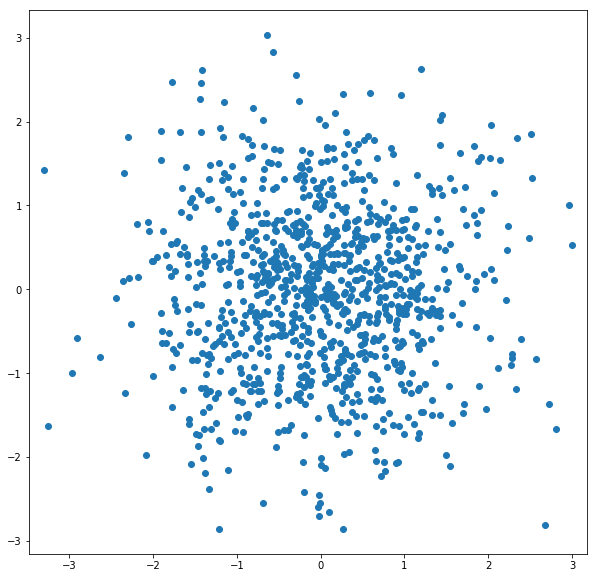

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])


In [6]:
# Create a random binary hash with projection_count bits

projection_count=25 # Each dimension dim vector will be hashed into projection_count bits
bias_bound = 3
rbp = RandomBinaryProjectionsBias('rbp', projection_count,bias_bound)

# Create engine with pipeline configuration
engine = Engine(dimension, lshashes=[rbp],distance=EuclideanDistance())


*** engine init done ***


In [7]:
for iter in range(20): 
    #print(data[:,iter])
    print(rbp.hash_vector(data[:,iter]))


['0000000000000000100000000']
['0000000000000000100000000']
['0000000000000000000100000']
['0000000000000000000000000']
['0000100000000000000000000']
['0000000000000000000000000']
['0000000000000000000000000']
['0000000000000000000000000']
['0000000000000000000000000']
['0000000000000000000000000']
['0000000000000000000100000']
['0000000000000000000000000']
['0000001000000000000000000']
['0000000000000000000000000']
['0000000000000000000000000']
['0000000000000000100000000']
['0000000000000000000000000']
['0000000000000000100000100']
['0000000000000000000000000']
['0000000000000000100000000']


In [8]:
# We are looking for the ten closest neighbours
# nearest = NearestFilter(10)

# We want unique candidates
# unique = UniqueFilter()


In [9]:
#help(RandomDiscretizedProjections)
#help(RandomBinaryProjections)
#help(Engine)

In [10]:
t0 = time.time()

# Index num_of_vectors random vectors (set their data to a unique string)
for index in range(num_of_vectors):
    v = data[:,index]
    engine.store_vector(v, 'data_%d' % index)                    
    
t1 = time.time()
print('Creating the data structure took %f seconds' % (t1-t0))

Creating the data structure took 0.021517 seconds


In [11]:
# Create random query vector
#query = numpy.random.randn(dimension)
query = [-1,-1]
print(query)

[-1, -1]


In [12]:
engine.candidate_count(query)

709

In [13]:
t0 = time.time()
# Get nearest neighbours
N = engine.neighbours(query,distance=EuclideanDistance(),vector_filters=[NearestFilter(200)])
#N = engine.neighbours(query,distance=EuclideanDistance())
t1 = time.time()
print('Query took %f seconds' % (t1-t0))

len(N)

Query took 0.008167 seconds


200

In [14]:
N

[(array([-0.9559728 , -0.99377448]), 'data_551', 0.044465168137255484),
 (array([-0.96326034, -0.93637069]), 'data_139', 0.0734744272354297),
 (array([-0.92765366, -1.11462707]), 'data_807', 0.1355483598630521),
 (array([-0.85297176, -1.04365312]), 'data_925', 0.15337176799982857),
 (array([-0.89470976, -1.1317441 ]), 'data_386', 0.16864916381083525),
 (array([-1.11076288, -0.83703339]), 'data_398', 0.19704449164688734),
 (array([-1.04704219, -1.19784574]), 'data_683', 0.20336151377230322),
 (array([-1.20213595, -0.97401152]), 'data_263', 0.20379975804474368),
 (array([-1.03473353, -0.78354746]), 'data_594', 0.21922162098497708),
 (array([-0.79257736, -0.92466481]), 'data_167', 0.22067973270679636),
 (array([-0.90685644, -0.78818905]), 'data_459', 0.23138626428487627),
 (array([-0.80485682, -1.12927527]), 'data_477', 0.2340789531502276),
 (array([-1.07445996, -1.23214728]), 'data_557', 0.2437963171286844),
 (array([-0.98493475, -0.75520222]), 'data_320', 0.2452609074028257),
 (array([-

In [15]:
# Real neighbours
print('\n *** Calculate Real neighbour distances ***')

dists=numpy.zeros(num_of_vectors)
t0 = time.time()
for iter in range(num_of_vectors):
    dists[iter] = EuclideanDistance().distance(data[:,iter], query)
dists = dists.reshape((-1,))
dists = sorted(dists)
t1 = time.time()
print('Query took %f seconds' % (t1-t0))

print('Exact distances:', dists[:10])

print('Max distance:', dists[-1])



 *** Calculate Real neighbour distances ***
Query took 0.015113 seconds
Exact distances: [0.044465168137255484, 0.0734744272354297, 0.1355483598630521, 0.15337176799982857, 0.16864916381083525, 0.19704449164688734, 0.20336151377230322, 0.20379975804474368, 0.21922162098497708, 0.22067973270679636]
Max distance: 4.525310735879224


In [16]:
#help(engine.neighbours)

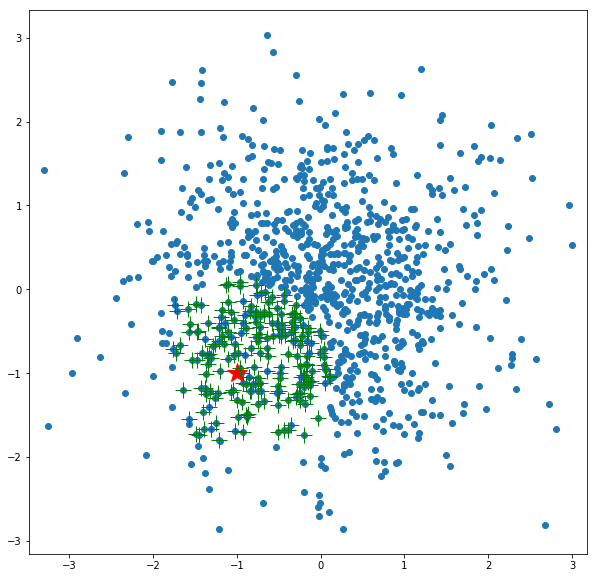

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])

plt.plot(query[0],query[1],'r*', markersize=20)
for iter in range(len(N)):
    #plt.plot(N[iter][0][0],N[iter][0][1],'g*', markersize=16)
    index=int(N[iter][1].split('_')[1])
    plt.plot(data[0,index],data[1,index],'g+', markersize=16)
